### **1. Data Inspection & Cleaning**
- Check for missing values and data types in both `client_data` and `price_data`.
- Ensure consistency in `id` to merge datasets properly.
- Handle missing values appropriately (e.g., imputation or removal).

### **2. Descriptive Statistics**
- Summarize numerical columns (mean, median, std, min, max, etc.).
- Identify unique values in categorical columns.

### **3. Data Distribution**
- Plot histograms and box plots for key variables (`cons_12m`, `margin_gross_pow_ele`, `price_off_peak_var`, etc.).
- Use KDE plots for price-related variables to see their distribution.

### **4. Relationship Between Price and Churn**
- Merge `client_data` with `price_data` using `id` to analyze pricing impact.
- Compare pricing trends for churned vs. retained customers using boxplots.
- Perform correlation analysis (heatmap) to check relationships between price, consumption, and churn.

### **5. Additional Factors Influencing Churn**
- Analyze categorical variables like `channel_sales` and `origin_up`.
- Compare churn rate across different sales channels.
- Check if customer tenure (`num_years_antig`) affects churn.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load datasets
client = pd.read_csv("../data/raw/client_data.csv")
price = pd.read_csv("../data/raw/price_data.csv")

# Display first few rows of each dataset
print("Client Data Sample:\n", client.head())
print("Price Data Sample:\n", price.head())

Client Data Sample:
                                  id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23            

In [9]:
# Check for missing values
print("\nMissing Values in Client Data:")
print(client.isnull().sum())

print("\nMissing Values in Price Data:")
print(price.isnull().sum())


Missing Values in Client Data:
id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

Missing Values in 

In [10]:
# Convert date columns to datetime format
client['date_activ'] = pd.to_datetime(client['date_activ'])
client['date_end'] = pd.to_datetime(client['date_end'])
client['date_modif_prod'] = pd.to_datetime(client['date_modif_prod'])
client['date_renewal'] = pd.to_datetime(client['date_renewal'])
price['price_date'] = pd.to_datetime(price['price_date'])

# Merge datasets on 'id' for analysis
merged_data = pd.merge(client, price, on='id', how='left')

In [11]:
# Summary statistics
print("\nDescriptive Statistics for Client Data:")
print(client.describe())

print("\nDescriptive Statistics for Price Data:")
print(price.describe())


Descriptive Statistics for Client Data:
           cons_12m  cons_gas_12m  cons_last_month  \
count  1.460600e+04  1.460600e+04     14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752   
min    0.000000e+00  0.000000e+00         0.000000   
25%    5.674750e+03  0.000000e+00         0.000000   
50%    1.411550e+04  0.000000e+00       792.500000   
75%    4.076375e+04  0.000000e+00      3383.000000   
max    6.207104e+06  4.154590e+06    771203.000000   
std    5.734653e+05  1.629731e+05     64364.196422   

                          date_activ                       date_end  \
count                          14606                          14606   
mean   2011-01-28 07:54:18.879912448  2016-07-27 20:48:26.422018560   
min              2003-05-09 00:00:00            2016-01-28 00:00:00   
25%              2010-01-15 00:00:00            2016-04-27 06:00:00   
50%              2011-03-04 00:00:00            2016-08-01 00:00:00   
75%              2012-04-19 00:00:00          

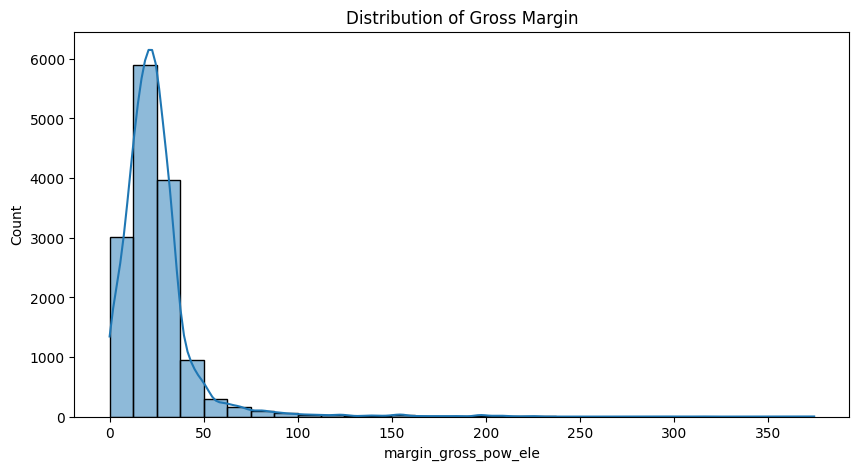

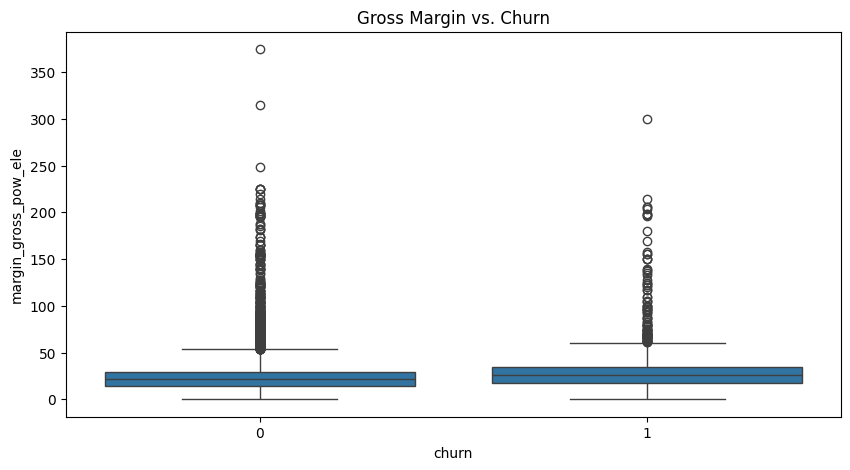

In [12]:
# Data visualization
plt.figure(figsize=(10, 5))
sns.histplot(client['margin_gross_pow_ele'], bins=30, kde=True)
plt.title("Distribution of Gross Margin")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='margin_gross_pow_ele', data=client)
plt.title("Gross Margin vs. Churn")
plt.show()

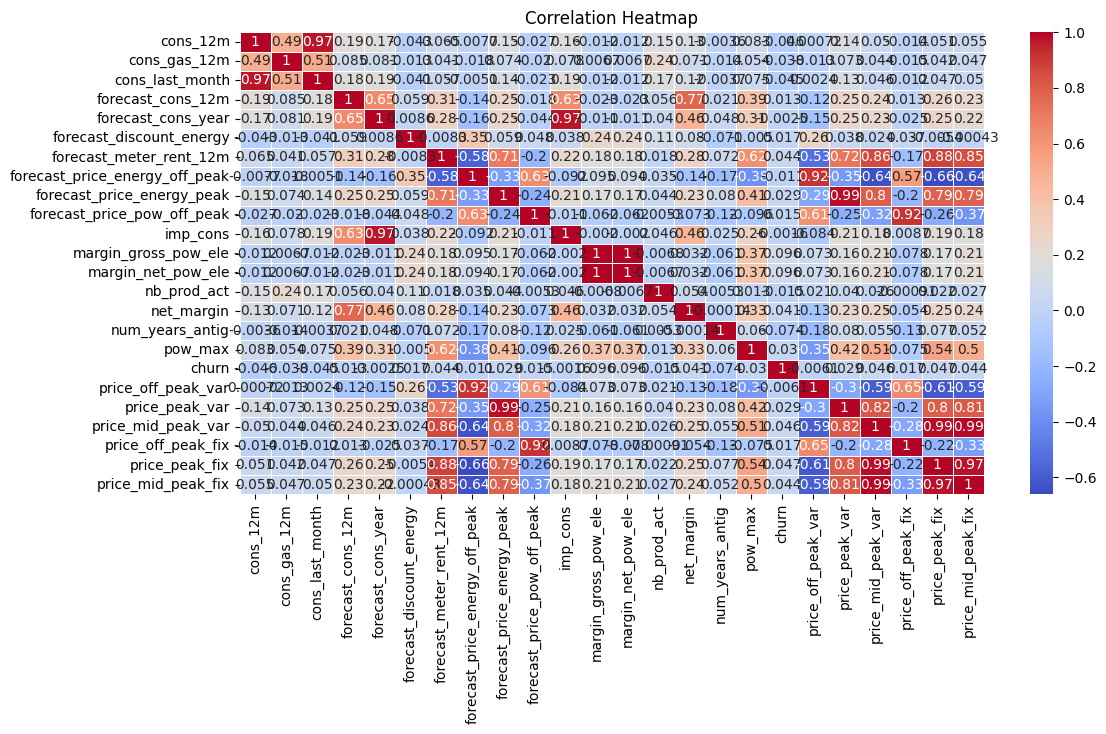

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
corr_matrix = merged_data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

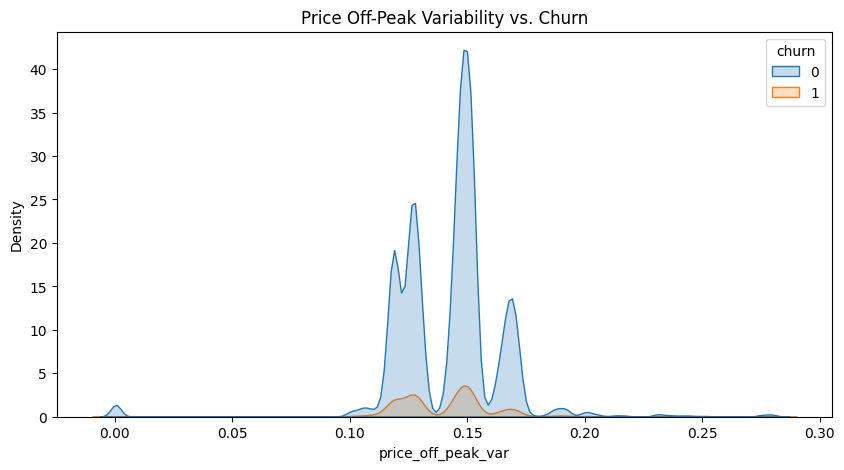

In [15]:
# KDE plot for price sensitivity
plt.figure(figsize=(10, 5))
sns.kdeplot(data=merged_data, x='price_off_peak_var', hue='churn', fill=True)
plt.title("Price Off-Peak Variability vs. Churn")
plt.show()

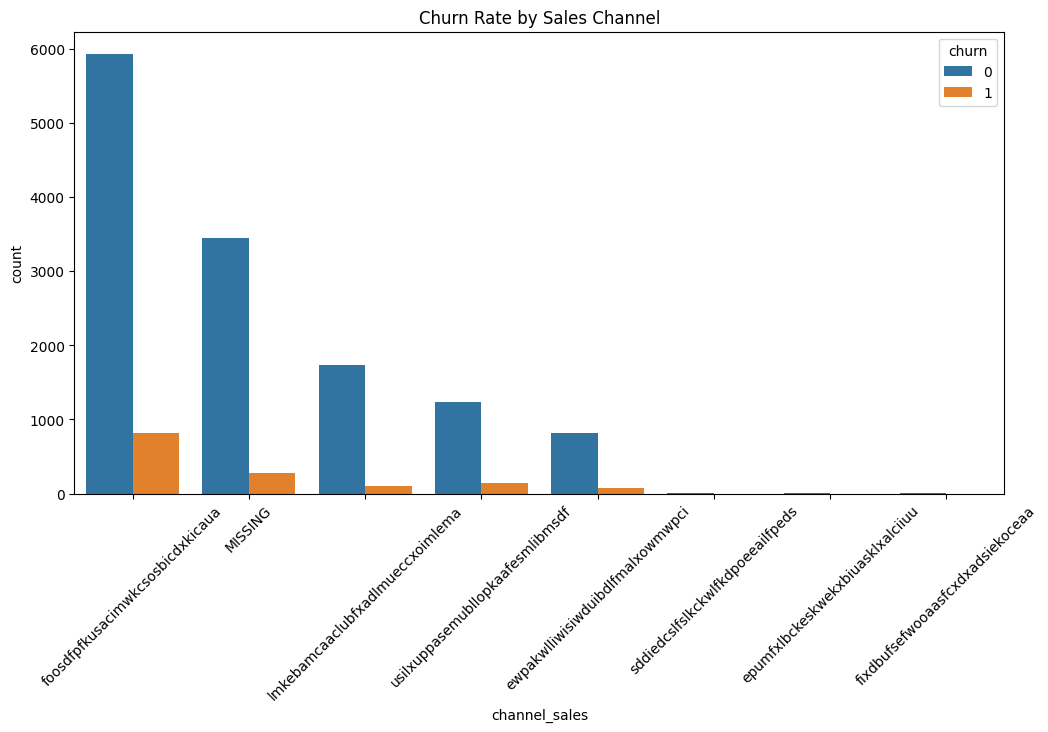

In [16]:
# Churn rate by sales channel
plt.figure(figsize=(12, 6))
sns.countplot(x='channel_sales', hue='churn', data=client, order=client['channel_sales'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Churn Rate by Sales Channel")
plt.show()

In [17]:
# Conclusion
print("\nEDA completed! Insights:\n")
print("- Examined distributions of key numerical variables.")
print("- Visualized relationships between price, margins, and churn.")
print("- Found correlations between price sensitivity and churn.")


EDA completed! Insights:

- Examined distributions of key numerical variables.
- Visualized relationships between price, margins, and churn.
- Found correlations between price sensitivity and churn.
